In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df_años = pd.read_csv("datos/concatenado.csv") #fichero de la unión años-tiquets
df_años.head()

,Unnamed: 0,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción,año
0,0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
1,1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
2,2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016
3,3,GDDTSR-5942488006,2016-04-28,320.0,40.0,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9.0,5.0,2016
4,4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016


In [5]:
df_empleados = pd.read_csv("datos/mergeado.csv") #fichero de la unión empleados-puestos
df_empleados.head()

,Unnamed: 0,ID Puesto,Puesto,Departamento,Tipo Puesto,Turno,ID Empleado,Apellido,Nombre,Email
0,0,10-23200,Ingeniero de Materiales,MATERIALES,Operativo,NaN,725,Villa,Eliana,eliana .villa@tractchun.com
1,1,10-23200,Ingeniero de Materiales,MATERIALES,Operativo,NaN,747,CHAVEZ,FEDERICO,federico.chavez@tractchun.com
2,2,10-23200,Ingeniero de Materiales,MATERIALES,Operativo,NaN,544,FIGUEROA,ANGEL,angel.figueroa@tractchun.com
3,3,10-24111,Operador de Producción,MATERIALES,Operativo,NaN,1376,Piedrahita,Gonzalo,gonzalo.piedrahita@tractchun.com
4,4,10-24111,Operador de Producción,MATERIALES,Operativo,NaN,44,González,Gonzalo,gonzalo.gonzález@tractchun.com


In [6]:
df_agentes = pd.read_csv("datos/Agentes.csv") #fichero de agentes
df_agentes.head()

,ID Agente,Nombre,email,Fecha de Nacimiento
0,1,Mata Lucero,lucero.mata@tractchun.com,1989/4/28
1,2,JesusGrajeda,jesus.grajeda@tractchun.com,1979/1/1
2,3,Elena Velez,elena.velez@tractchun.com,1993/6/6
3,4,Barraza Alberto,alberto.barraza@tractchun.com,1978/10/20
4,5,Willyberto Gonzales,willyberto.gonzales@tractchun.com,1973/5/11




Sigamos con más visualizaciones. En este caso trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno. Al final nos habíamos quedado con los siguientes conjuntos de datos El fichero de la unión de todos los conjuntos de datos de los distintos años El fichero con la unión de los datos de puestos y empleados. El fichero de los agentes. 📌 NOTA Os dejamos abajo los ficheros por si no os hubiera dado tiempo a tenerlos preparados El objetivo de hoy, mejorar algunas de las gráficas que hicimos en el ejericio de pair programming de ayer y crear algunas nuevas aprovechando que tenemos algunas columnas nuevas en dataframe Las preguntas que tendréis que contestar son:

1. Ayer creamos un par de gráficas para los tickets de la categoría "Software" y "Hardware", donde visualizamos el número de clientes que teníamos en cada grupo de satisfacción. Hoy tendréis que hacer dos gráficas con subplots:

- En la primera debéis mostrar la cantidad de tickets en función del tipo (si es Problema o Solicitud), cada subplot corresponderá a cada una de las categorías. Debéis:

-Poner nombre a los ejes de cada uno de los subplots

- Poner un títulos a cada uno de los subplots

- Poner el color de las líneas en negro.

- Establecer el tamaño de la gráfica a 15 x 5

- Ponerle marcadores a las gráficas

- No incluir leyenda

In [12]:
df_sof = df_años[df_años['Categoría'] == 'Software'] #traemos la categoría software
df_sof.head(1)

,Unnamed: 0,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción,año
4,4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016


In [15]:
df_sof_tip = df_sof['Tipo'].value_counts().reset_index() #sacamos los valores tipo de sofware
df_sof_sat = df_sof['Satisfacción'].value_counts().reset_index() #sacamos los valores satisfacción de software

In [13]:
df_har = df_años[df_años['Categoría'] == 'Hardware'] #traemos la categoría hardware
df_har.head(1)

,Unnamed: 0,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción,año
15,15,GDLEER-2342731423,2016-12-27,422.0,24.0,Hardware,Problema,2 - Normal,0 - Sin Asignar,10.0,5.0,2016


In [16]:
df_har_tip = df_har['Tipo'].value_counts().reset_index() #al igual que arriba, sacamos valores tipo y satisfacción de hardware
df_har_sat = df_har['Satisfacción'].value_counts().reset_index()

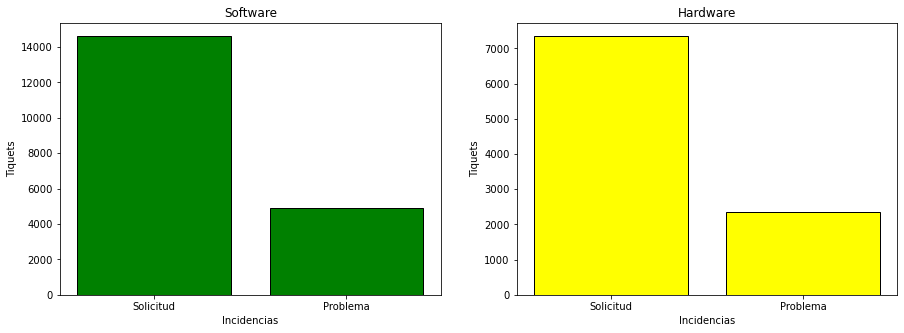

In [22]:
fig,ax = plt.subplots(1,2, figsize=(15,5)) #esta será la gráfica del tipo de tiquets con las instrucciones del enunciado

ax[0].bar(df_sof_tip["index"], df_sof_tip["Tipo"], edgecolor='black', color='green')
ax[0].set_xlabel('Incidencias')
ax[0].set_ylabel('Tiquets')

ax[1].bar(df_har_tip['index'], df_har_tip['Tipo'], edgecolor='black', color='yellow')
ax[1].set_xlabel('Incidencias')
ax[1].set_ylabel('Tiquets')

ax[0].set_title('Software')
ax[1].set_title('Hardware')

plt.savefig('incidencias.jpg') #guardamos en imagen el subplot
plt.show()

- -En la segunda debéis mostrar el número de tickets en función de la satisfacción.

 - De nuevo tendréis que ponerle nombre a los ejes y título a cada gráfica.
 - En este caso el subplot deberá tener dos filas y una columna
 - No incluir leyenda
 - Cambiar el color de las barras


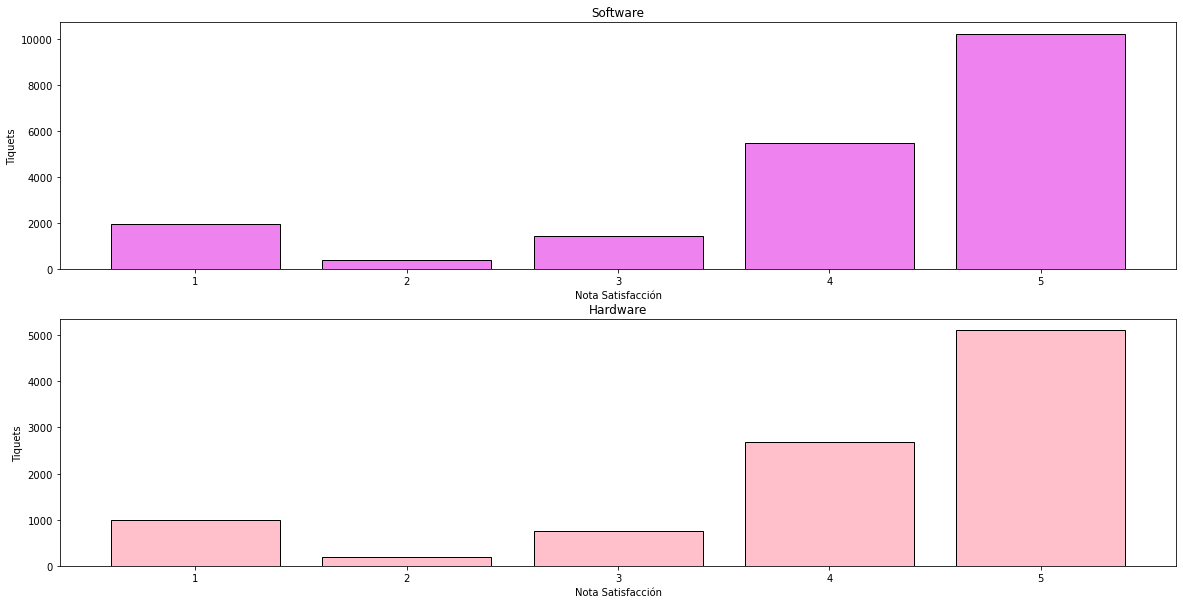

In [36]:
fig,ax = plt.subplots(2,1, figsize=(20, 10)) #esta será la gráfica de satisfacción con las instrucciones del enunciado

ax[0].bar(df_sof_sat["index"], df_sof_sat["Satisfacción"], edgecolor='black', color='violet')
ax[0].set_xlabel('Nota Satisfacción')
ax[0].set_ylabel('Tiquets')

ax[1].bar(df_har_sat['index'], df_har_sat['Satisfacción'], edgecolor='black', color='pink')
ax[1].set_xlabel('Nota Satisfacción')
ax[1].set_ylabel('Tiquets')

ax[0].set_title('Software')
ax[1].set_title('Hardware')

plt.savefig('satisfaccion.jpg') #guardamos en imagen el subplot
plt.show()



2. Cread un subplot con dos gráficas, dónde en la primera tengamos el número de empleados por departamento y en la otra por tipo de puesto. Debéis:



- Poner leyenda a la gráfica
- Cada línea debe ir en un color
- Ponerle nombre a los ejes y a la gráfica.
- Poner marcadores a las lineas


In [27]:
df_departamentos = df_empleados['Departamento'].value_counts().reset_index() #Traemos los departamentos del fichero empleados

In [29]:
df_departamentos.head(1)

,index,Departamento
0,PRODUCCION,475


In [28]:
df_puestos = df_empleados['Puesto'].value_counts().reset_index()#Traemos los puestos de empleados

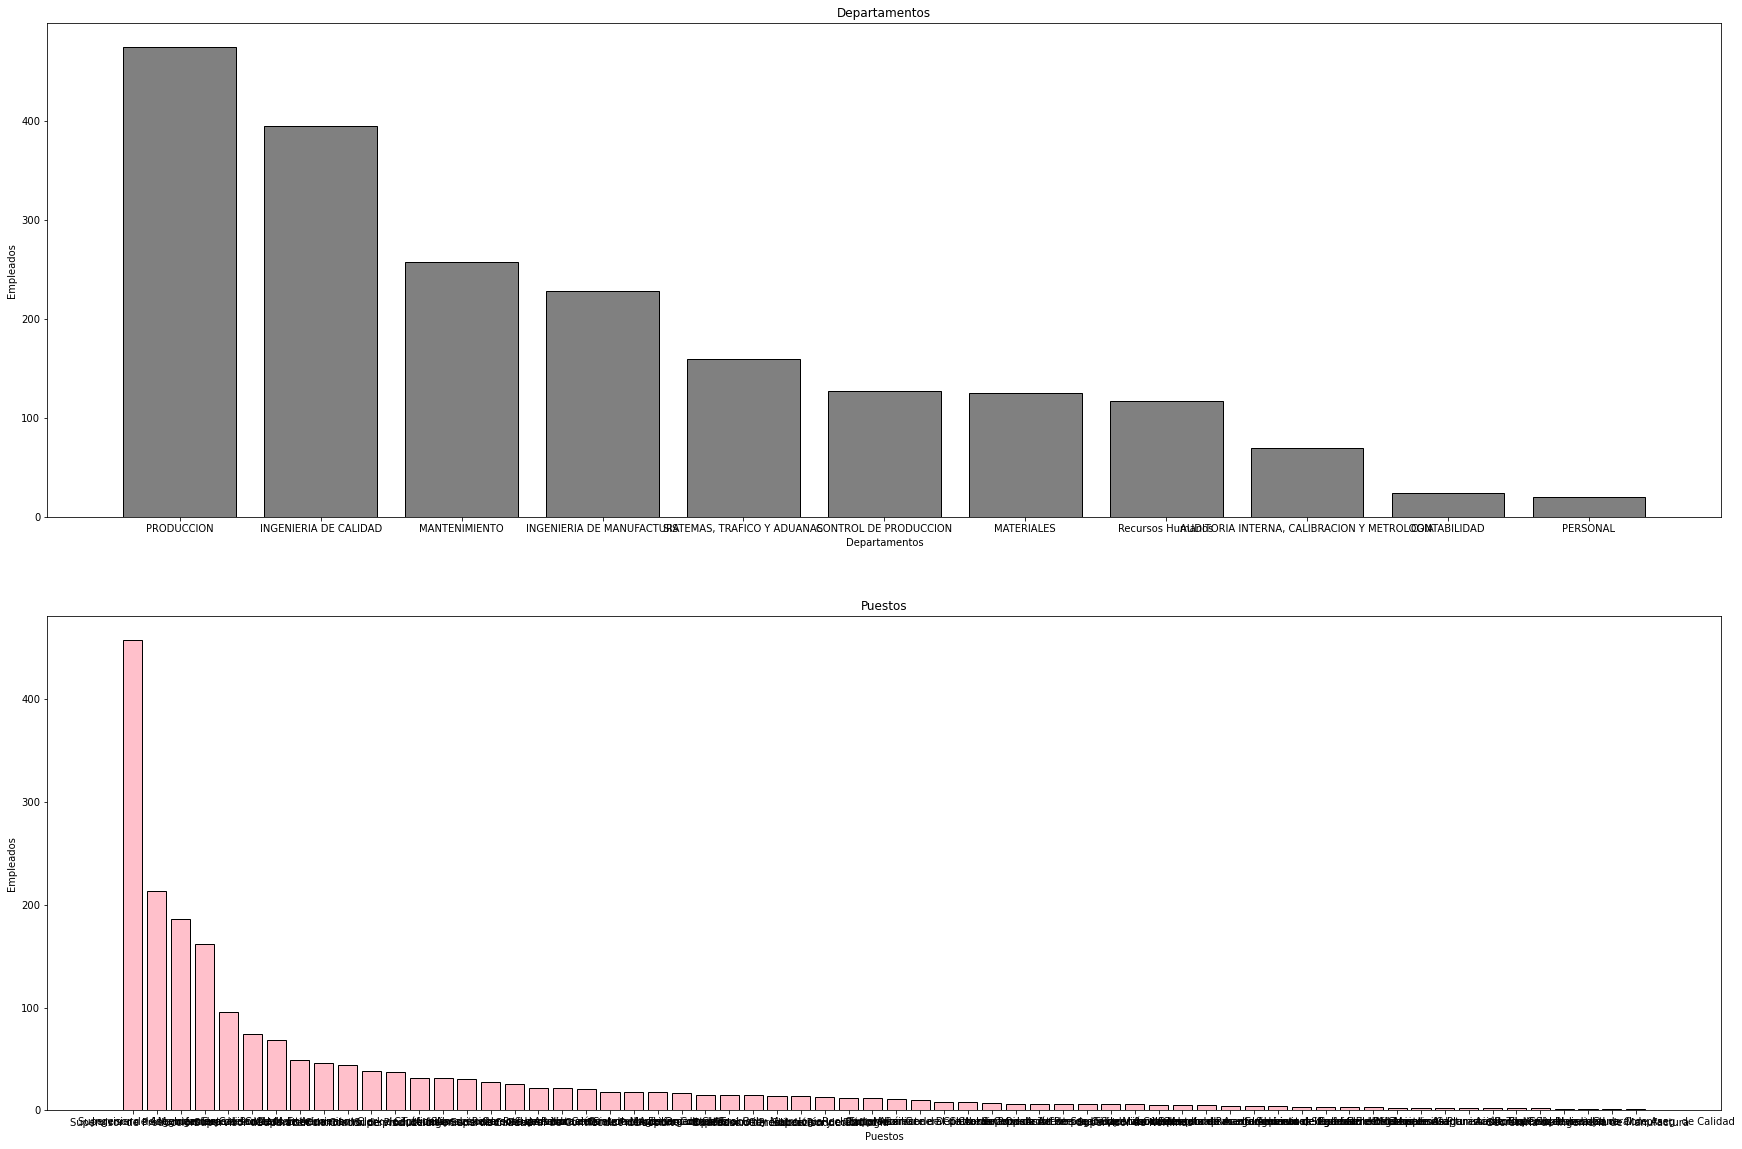

In [35]:
fig,ax = plt.subplots(2,1, figsize=(30,20)) #esta será la gráfica de empleados por departamento y puestos, con las instrucciones del enunciado

ax[0].bar(df_departamentos["index"], df_departamentos["Departamento"], edgecolor='black', color='grey')
ax[0].set_xlabel('Departamentos')
ax[0].set_ylabel('Empleados')

ax[1].bar(df_puestos['index'], df_puestos['Puesto'], edgecolor='black', color='pink')
ax[1].set_xlabel('Puestos')
ax[1].set_ylabel('Empleados')

ax[0].set_title('Departamentos')
ax[1].set_title('Puestos')

plt.savefig('departamentos_puestos.jpg') #guardamos en imagen el subplot
plt.show()